In [1]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("/Users/hendricpopma/Documents/Uni/Uni_6_Sem/Bums/project_bums/Test_Bilder/IMG_7546.jpeg", 0 )
plt.gray()

<Figure size 640x480 with 0 Axes>

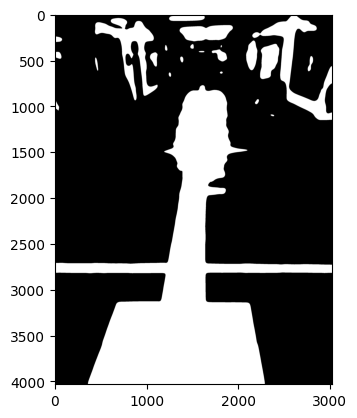

In [3]:
gauss = cv2.GaussianBlur(img, None, 20)
plt.imshow(gauss)
t, seg = cv2.threshold(gauss,150,1,cv2.THRESH_BINARY) #streifen = 200
plt.imshow(seg)

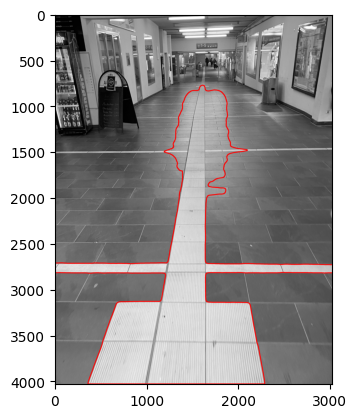

In [4]:
cnts, hierachy = cv2.findContours(seg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
out = cv2.merge((img, img, img))
area = []
for cnt in cnts:
    area.append(cv2.contourArea(cnt))
c_idx = area.index(max(area))

cv2.drawContours(out, cnts, c_idx, [255,0,0], 10)
plt.imshow(out)

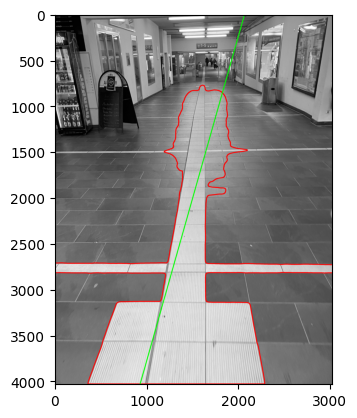

In [5]:
#fit line through contour
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnts[c_idx], cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv2.line(out,(cols-1,righty),(0,lefty),(0,255,0),10)
plt.imshow(out)

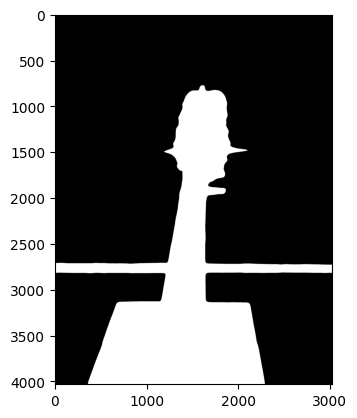

In [6]:
black = np.zeros(np.shape(img),dtype='uint8')
cv2.drawContours(black, cnts, c_idx, [255,255,255], cv2.FILLED)
plt.imshow(black)

In [73]:
black_short = black[2000:,:]

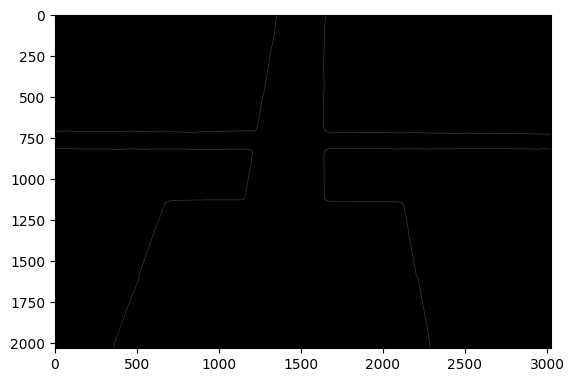

In [81]:
derx=cv2.Sobel(black_short, cv2.CV_32F, 1, 0,)
dery=cv2.Sobel(black_short, cv2.CV_32F, 0, 1,)
gradmag=np.sqrt(derx**2 + dery**2)
plt.imshow(gradmag > 250)
gradmag_w = (gradmag > 250).astype('uint8')
canny = cv2.Canny(black_short, 0, 0)
plt.imshow(canny)

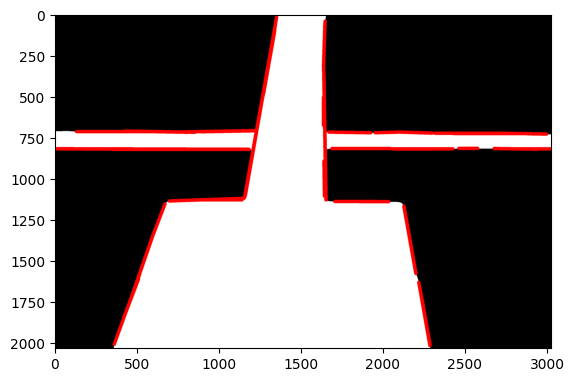

In [82]:
# canny = cv2.Canny(black_short,0 ,0,)
# plt.imshow(canny)
linesh = cv2.HoughLinesP(canny, 1, np.pi/180, 60,
                        minLineLength=100, maxLineGap=300)

lines=np.squeeze(linesh)
black_new = cv2.merge((black_short, black_short, black_short))
for (x1,y1,x2,y2) in lines:
    cv2.line(black_new, (x1,y1), (x2,y2), (255,0,0), 20)
plt.imshow(black_new)

In [ ]:
# put mask on picture = mask has to be same shape 
new_img = cv2.bitwise_and(img, img, mask=black)
plt.imshow(new_img)

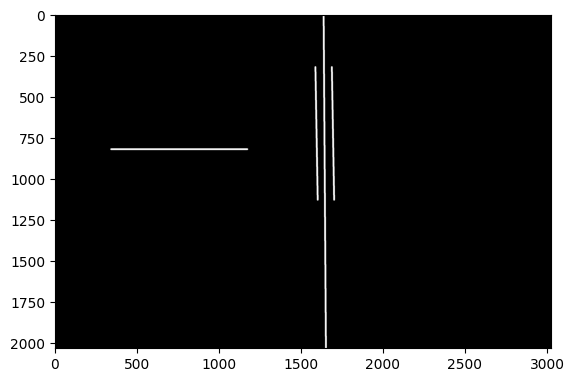

In [89]:
# find the longes line in x and y 
height, width, _ = black_new.shape
diffx = []
diffy = []
for (x1,y1,x2,y2) in lines:
    diffx.append(x2-x1)
    diffy.append(y2-y1)
diffx.index(max(diffx))
llinex = lines[diffx.index(max(diffx))]
lliney = lines[diffy.index(max(diffy))]
blank = np.zeros(black_new.shape, dtype=np.uint8)
blank = cv2.line(blank, (llinex[0],llinex[1]), (llinex[2],llinex[3]), (255,255,255), 10)
#blank = cv2.line(blank, (lliney[0],lliney[1]), (lliney[2],lliney[3]), (255,255,255), 10 ) 
blank = cv2.line(blank, (lliney[0],0), (lliney[2],height), (255,255,255), 10 ) 
blank = cv2.line(blank, (lliney[0]-50,lliney[1]), (lliney[2]-50,lliney[3]), (255,255,255), 10 )
blank = cv2.line(blank, (lliney[0]+50,lliney[1]), (lliney[2]+50,lliney[3]), (255,255,255), 10 )
plt.imshow(blank)

vertical line  -> longest line and connect it over the hole picture
horizontal line -> extend it to the vertical line or check if longest horizontal line is left or right fromm the vertical line


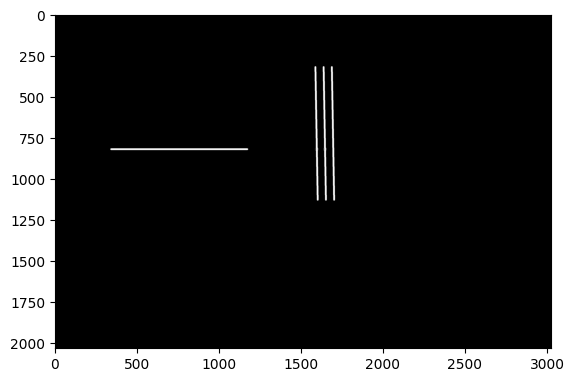

In [84]:
#find intersections from script with offset line 
# so we get two/three intersections left and rigth from the "masterline"
def find_intersection(l1, l2, offset):
    x1=l1[0]; y1=l1[1]
    x2=l1[2]; y2=l1[3]
    x3=l2[0]+offset; y3=l2[1]
    x4=l2[2]+offset; y4=l2[3]
    denom=(x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
    #print(denom)
    if(denom):
        px=((x1*y2-y1*x2)*(x3-x4) - (x1-x2)*(x3*y4-y3*x4))/denom 
        py=((x1*y2-y1*x2)*(y3-y4) - (y1-y2)*(x3*y4-y3*x4))/denom
    else: 
        px=-1
        py=-1
    return (px,py)
sy,sx=img.shape
px=[]
py=[]
for x in range(-50,50,50):
    p=find_intersection(llinex,lliney,x)
    if(p[0]>0 and p[0]<sx and p[1]>0 and p[1]<sy):
        px.append(p[0])
        py.append(p[1])

#res = final.copy()
for x in range(len(px)):
    blank = cv2.circle(blank, (px[x].astype('int'), py[x].astype('int')),10, [255,255,255])
plt.imshow(blank)

In [19]:
#line to right or left
if px[0] - px[1] < 0: 
    print("go left")
elif px[0] - px[1] > 0: 
    print("go right")
if len(px) > 2:
    print("you can go left or right") 

go left
